In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Get the Dataset
from google.colab import files
uploaded = files.upload()

Saving Loan Approval.csv to Loan Approval.csv


In [3]:
#Read the dataset
df = pd.read_csv('Loan Approval.csv')

In [4]:
#Take a quick look at the dataset
df.head()
df.isnull().sum()

SME_LOAN_ID_NO           0
GENDER                  13
MARITAL_STATUS           3
FAMILY_MEMBERS          15
QUALIFICATION            0
EMPLOYMENT              32
CANDIDATE_INCOME         0
GUARANTEE_INCOME         0
LOAN_AMOUNT             22
LOAN_DURATION           14
LOAN_HISTORY            50
LOAN_LOCATION            0
LOAN_APPROVAL_STATUS     0
dtype: int64

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SME_LOAN_ID_NO        614 non-null    object 
 1   GENDER                601 non-null    object 
 2   MARITAL_STATUS        611 non-null    object 
 3   FAMILY_MEMBERS        599 non-null    object 
 4   QUALIFICATION         614 non-null    object 
 5   EMPLOYMENT            582 non-null    object 
 6   CANDIDATE_INCOME      614 non-null    int64  
 7   GUARANTEE_INCOME      614 non-null    float64
 8   LOAN_AMOUNT           592 non-null    float64
 9   LOAN_DURATION         600 non-null    float64
 10  LOAN_HISTORY          564 non-null    float64
 11  LOAN_LOCATION         614 non-null    object 
 12  LOAN_APPROVAL_STATUS  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,CANDIDATE_INCOME,GUARANTEE_INCOME,LOAN_AMOUNT,LOAN_DURATION,LOAN_HISTORY
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Only variables CANDIDATE_INCOME, GUARANTEE_INCOME, LOAN_AMOUNT, LOAN_DURATION AND LOAN_HISTORY ARE CONTINUOUS VARIABLES
#Impute missing values for continuous variables first
#Using mean values for imputation of missing values in continuous variables
missing_col = ['LOAN_AMOUNT', 'LOAN_DURATION', 'LOAN_HISTORY']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()




In [7]:
df.isnull().sum()

SME_LOAN_ID_NO           0
GENDER                  13
MARITAL_STATUS           3
FAMILY_MEMBERS          15
QUALIFICATION            0
EMPLOYMENT              32
CANDIDATE_INCOME         0
GUARANTEE_INCOME         0
LOAN_AMOUNT              0
LOAN_DURATION            0
LOAN_HISTORY             0
LOAN_LOCATION            0
LOAN_APPROVAL_STATUS     0
dtype: int64

In [8]:
#Next, imputation of missing values for categorical variables of GENDER, MARITAL STATUS, FAMILY_MEMBERS AND EMPLOYMENT
# for each column, get value counts in decreasing order and take the index (value) of most common class
#Renaming the new dataset of imputed missing values as df1
df1 = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df1

,SME_LOAN_ID_NO,GENDER,MARITAL_STATUS,FAMILY_MEMBERS,QUALIFICATION,EMPLOYMENT,CANDIDATE_INCOME,GUARANTEE_INCOME,LOAN_AMOUNT,LOAN_DURATION,LOAN_HISTORY,LOAN_LOCATION,LOAN_APPROVAL_STATUS
0,LP001002,Male,Not Married,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,City,Y
1,LP001003,Male,Married,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Village,N
2,LP001005,Male,Married,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,City,Y
3,LP001006,Male,Married,0,Under Graduate,No,2583,2358.0,120.000000,360.0,1.0,City,Y
4,LP001008,Male,Not Married,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,City,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,Not Married,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Village,Y
610,LP002979,Male,Married,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Village,Y
611,LP002983,Male,Married,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,City,Y
612,LP002984,Male,Married,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,City,Y


In [9]:
#Checking if new data frame df1 has missing values
df1.isnull().sum()

SME_LOAN_ID_NO          0
GENDER                  0
MARITAL_STATUS          0
FAMILY_MEMBERS          0
QUALIFICATION           0
EMPLOYMENT              0
CANDIDATE_INCOME        0
GUARANTEE_INCOME        0
LOAN_AMOUNT             0
LOAN_DURATION           0
LOAN_HISTORY            0
LOAN_LOCATION           0
LOAN_APPROVAL_STATUS    0
dtype: int64

In [10]:
#Rename columns
df1.rename(columns={'SME_LOAN_ID_NO': 'LOAN ID'}, inplace=True)

In [11]:
#Delete the "+" symbol in the column 'FAMILY_MEMBERS' and replace with a '' space
df1=df1.replace('\+','',regex=True)

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

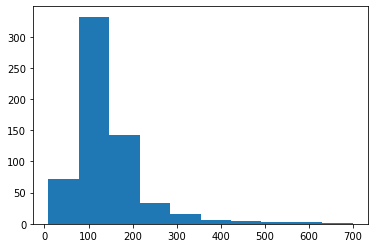

In [13]:
#only LOAN_AMOUNT has correlation with CANDIDATE_INCOME
#Next, plotting of histogram is performed for LOAN_AMOUNT to see the distribution for loan amount that each client is asking for

plt.hist(df1['LOAN_AMOUNT'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6a8633190>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb6a85be1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6a85c6210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6a85bec90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6a8633710>,
  <matplotlib.lines.Line2D at 0x7fb6a8633c50>]}

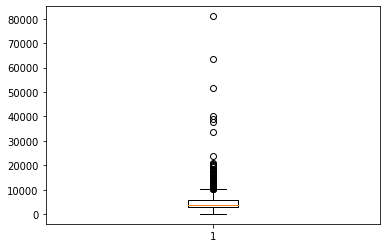

In [14]:
#Boxplot of CANDIDATE_INCOME is shown for outliers in each monthly income of the candidate
plt.boxplot(df1['CANDIDATE_INCOME'])

In [55]:
#Finding the IQR for all columns in the dataset
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

In [56]:
#Finding upper and lower limit
import scipy
from scipy import stats
from scipy.stats import iqr
import math

iqr = Q3 - Q1
print(iqr)


CANDIDATE_INCOME    2917.50
GUARANTEE_INCOME    2297.25
LOAN_AMOUNT           64.50
LOAN_DURATION          0.00
LOAN_HISTORY           0.00
dtype: float64


In [58]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print(upper_limit)

CANDIDATE_INCOME    10171.250
GUARANTEE_INCOME     5743.125
LOAN_AMOUNT           261.500
LOAN_DURATION         360.000
LOAN_HISTORY            1.000
dtype: float64


In [61]:
new_df = df1[df1['CANDIDATE_INCOME'] < 10171.25]
new_df.shape

(564, 13)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6a0cdde50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb6a0cc4f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6a0d2e4d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6a0cbda10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6a0cc4490>,
  <matplotlib.lines.Line2D at 0x7fb6a0cc49d0>]}

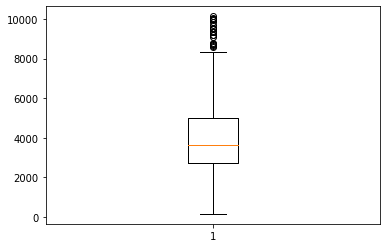

In [62]:
#Plot new boxplot with outliers for CANDIDATE_INCOME removed
plt.boxplot(new_df['CANDIDATE_INCOME'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6a0babc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb6a0bb2c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6a0bbacd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6a0bba790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6a0bb2210>,
  <matplotlib.lines.Line2D at 0x7fb6a0bb2750>]}

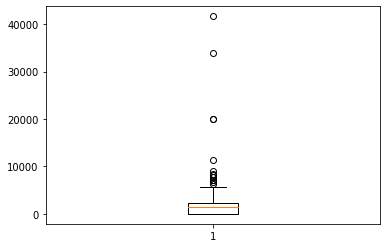

In [65]:
plt.boxplot(new_df['GUARANTEE_INCOME'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6a0b27210>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb6a0b2d250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6a0b33290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6a0b2dd10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6a0b277d0>,
  <matplotlib.lines.Line2D at 0x7fb6a0b27d10>]}

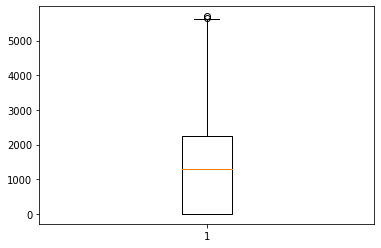

In [67]:
new_df1 = new_df[new_df['GUARANTEE_INCOME'] < 5743]
new_df1.shape
plt.boxplot(new_df1['GUARANTEE_INCOME'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6a0b0b6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb6a0a916d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6a0a99710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6a0a991d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6a0b0bc10>,
  <matplotlib.lines.Line2D at 0x7fb6a0a91190>]}

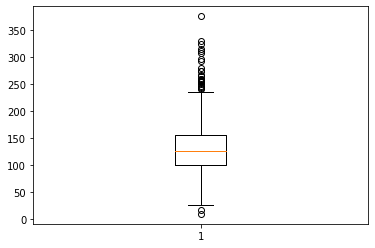

In [68]:
plt.boxplot(new_df1['LOAN_AMOUNT'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6a0eeb6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb6a0bbfcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6a0b58a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6a0bf0f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6a0ef1990>,
  <matplotlib.lines.Line2D at 0x7fb6a0c04dd0>]}

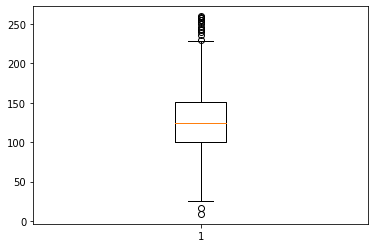

In [69]:
new_df2 = new_df1[new_df1['LOAN_AMOUNT'] <261.5]
new_df2.shape
plt.boxplot(new_df2['LOAN_AMOUNT'])

In [71]:
df2 = new_df2.copy() #New dataset df2 which is a copy of the dataset with outliers removed
df2.describe()

,CANDIDATE_INCOME,GUARANTEE_INCOME,LOAN_AMOUNT,LOAN_DURATION,LOAN_HISTORY
count,535.000000,535.000000,535.000000,535.000000,535.000000
mean,4053.818692,1322.784897,127.045314,342.145794,0.841523
std,1853.376675,1421.206067,44.618305,65.402136,0.350586
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2752.500000,0.000000,100.000000,360.000000,1.000000
50%,3598.000000,1260.000000,124.000000,360.000000,1.000000
75%,4891.000000,2194.000000,151.500000,360.000000,1.000000
max,10139.000000,5701.000000,260.000000,480.000000,1.000000


Now the dataset has outliers removed, and is smooth. Next, the target variable which is LOAN_APPROVAL_STATUS is used to predict if the loan has been approved. Y indicates YES for loan approved, and N indicates NO for loan approved. 

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Categorical variable must be converted to numeric

In [88]:
df2.dtypes

LOAN ID                  object
GENDER                   object
MARITAL_STATUS           object
FAMILY_MEMBERS           object
QUALIFICATION            object
EMPLOYMENT               object
CANDIDATE_INCOME          int64
GUARANTEE_INCOME        float64
LOAN_AMOUNT             float64
LOAN_DURATION           float64
LOAN_HISTORY            float64
LOAN_LOCATION            object
LOAN_APPROVAL_STATUS     object
dtype: object

GENDER, MARITAL_STATUS, FAMILY_MEMBERS, QUALIFICATION, EMPLOYMENT, LOAN_LOCATION and LOAN_APPROVAL_STATUS are "object" types and must be converted to numeric format. Pandas has a helpful select_dtypes function which can be used to build a new dataframe containing only the object columns.

In [107]:
obj_df = df2.select_dtypes(include=['object']).copy()
obj_df.head()

,LOAN ID,GENDER,MARITAL_STATUS,FAMILY_MEMBERS,QUALIFICATION,EMPLOYMENT,LOAN_LOCATION,LOAN_APPROVAL_STATUS
0,LP001002,Male,Not Married,0,Graduate,No,City,Y
1,LP001003,Male,Married,1,Graduate,No,Village,N
2,LP001005,Male,Married,0,Graduate,Yes,City,Y
3,LP001006,Male,Married,0,Under Graduate,No,City,Y
4,LP001008,Male,Not Married,0,Graduate,No,City,Y


In [108]:
obj_df["GENDER"].value_counts()

Male      435
Female    100
Name: GENDER, dtype: int64

In [109]:
obj_df["QUALIFICATION"].value_counts()

Graduate          404
Under Graduate    131
Name: QUALIFICATION, dtype: int64

In [110]:
obj_df["EMPLOYMENT"].value_counts()

No     474
Yes     61
Name: EMPLOYMENT, dtype: int64

In [111]:
obj_df["LOAN_LOCATION"].value_counts()

Town       205
City       170
Village    160
Name: LOAN_LOCATION, dtype: int64

In [112]:
obj_df["MARITAL_STATUS"].value_counts()

Married        348
Not Married    187
Name: MARITAL_STATUS, dtype: int64

In [113]:
obj_df["FAMILY_MEMBERS"].value_counts()

0    321
2     90
1     84
3     40
Name: FAMILY_MEMBERS, dtype: int64

In [114]:
obj_df["LOAN_APPROVAL_STATUS"].value_counts()

Y    372
N    163
Name: LOAN_APPROVAL_STATUS, dtype: int64

Defining the "cleanup_nums" function and the "replace" function to substitute categorical values to numerical values for all the categorical variables is important to produce a wholly numeric data

In [124]:
cleanup_nums = {"GENDER":     {"Male": 0, "Female": 1},
                "QUALIFICATION": {"Graduate": 0, "Under Graduate" : 1},
                "EMPLOYMENT": {"No": 0, "Yes": 1},
                "LOAN_LOCATION" :{"City": 0, "Village": 1, "Town": 2},
                "MARITAL_STATUS" :{"Not Married": 0, "Married": 1},
                "FAMILY_MEMBERS" :{"0" : 0, "1": 1, "2" : 2, "3" : 3},
                "LOAN_APPROVAL_STATUS" :{"N" : 0, "Y": 1}}

"cleanup_nums" has been defined for all the categorical variables in the dataset. Next, the "replace" function is used to convert the columns to numbers format. The new dataset is now named as df1_new

In [125]:
df1_new = df2.replace(cleanup_nums1)
df1_new.head()

,LOAN ID,GENDER,MARITAL_STATUS,FAMILY_MEMBERS,QUALIFICATION,EMPLOYMENT,CANDIDATE_INCOME,GUARANTEE_INCOME,LOAN_AMOUNT,LOAN_DURATION,LOAN_HISTORY,LOAN_LOCATION,LOAN_APPROVAL_STATUS
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1


Now, all the variables used are of numeric values

In [126]:
df1_new.dtypes

LOAN ID                  object
GENDER                    int64
MARITAL_STATUS            int64
FAMILY_MEMBERS            int64
QUALIFICATION             int64
EMPLOYMENT                int64
CANDIDATE_INCOME          int64
GUARANTEE_INCOME        float64
LOAN_AMOUNT             float64
LOAN_DURATION           float64
LOAN_HISTORY            float64
LOAN_LOCATION             int64
LOAN_APPROVAL_STATUS      int64
dtype: object

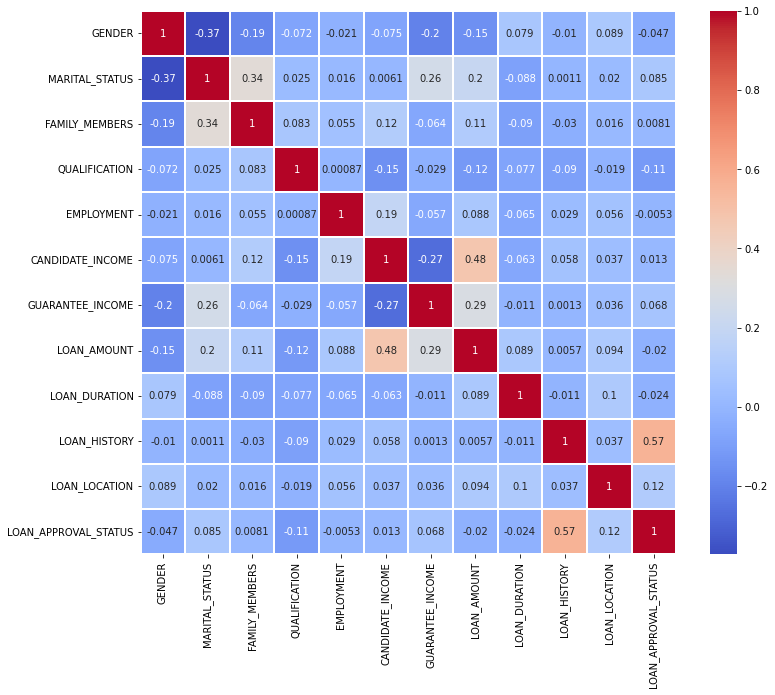

In [127]:
plt.figure(figsize=(12,10))
corr = df1_new.corr()
sns.heatmap(corr, annot=True, linewidths=1, cmap='coolwarm')

From the correlation table, the cols (Dependent variables) that have a high correlation with LOAN_APPROVAL_STATUS (the target variable) are QUALIFICATION, LOAN_HISTORY, LOAN_LOCATION)

> Indented block



Optimal number of features: 1
Selected features: ['LOAN_HISTORY']


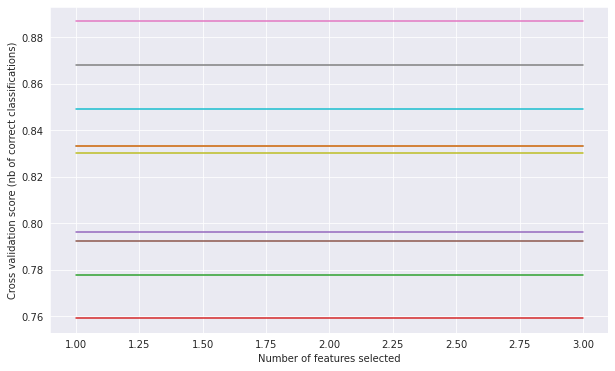

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

cols = ['QUALIFICATION','LOAN_HISTORY', 'LOAN_LOCATION']
x = df1_new[cols]
y = df1_new['LOAN_APPROVAL_STATUS']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x, y)

# Build a logreg and compute the feature importances
model = LogisticRegression()
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


Based on the above, only the feature "LOAN_HISTORY" was selected into the Logistic Regression

In [137]:
df1_new.shape

(535, 13)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(df1_new[['LOAN_HISTORY']], df1_new.LOAN_APPROVAL_STATUS, train_size = 0.75, random_state = 0)

In [139]:
x_train.shape

(401, 1)

In [140]:
x_test.shape

(134, 1)

The dataset has been split into a 75% training dataset and a 25% testing dataset

In [142]:
model = LogisticRegression(solver='liblinear') ## For small datasets, ‘liblinear’ is a good choice
model.fit(x_train,y_train)

y_predicted = model.predict(x_test)
print('The Predicted values are: ', y_predicted)

The Predicted values are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]


In [143]:
print('The probability estimates are: \n', model.predict_proba(x_test))  ## Those with probability>0.5 are classified as '0' otherwise '1'

The probability estimates are: 
 [[0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.27496831 0.72503169]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.85076916 0.14923084]
 [0.18582552 0.81417448]
 [0.85076916 0.14923084]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.27496831 0.72503169]
 [0.27496831 0.72503169]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.85076916 0.14923084]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.85076916 0.14923084]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81417448]
 [0.18582552 0.81

Text(51.0, 0.5, 'Actual label')

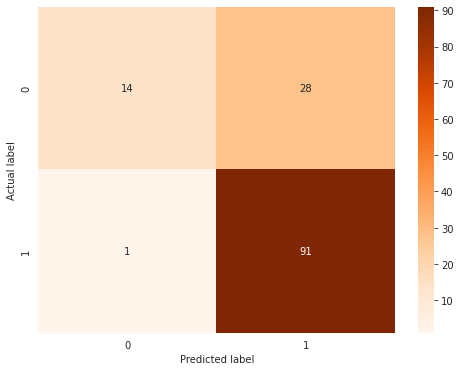

In [146]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
cnf_matrix

plt.figure(figsize = (8,6))
sns.heatmap(cnf_matrix, annot=True,cmap='Oranges')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

True Negatives (TN) = 14, True Positives (TP) = 91, False Negatives (FN) = 1 and False Positives (FP) = 28

Classification accuracy can be defined as 'number of items in a class labeled correctly out of all items in that class'.
The formula for Classification accuracy is (TP+TN)/(TP+TN+FP+FN)

In [147]:
from sklearn.metrics import accuracy_score
accuracy = metrics.accuracy_score(y_test, y_predicted)
accuracy_percentage = accuracy * 100
print('The percentage of correct predictions for the test data: ', accuracy_percentage)

The percentage of correct predictions for the test data:  78.35820895522389


Recall Score can be defined as 'Out of all the items that are truly positive, how many were correctly classified as positive'.
Or simply, how many positive items were 'recalled' from the dataset.
The formula for Recall Score is TP/(TP+FN).

In [148]:
from sklearn.metrics import recall_score
recall = metrics.recall_score(y_test,y_predicted).round(2)
print('Recall score: ', recall)

Recall score:  0.99


Precision Score can be defined as 'Out of all the items labeled as positive, how many truly belong to the positive class'.
The formula for Precision Score is TP/(TP+FP)

In [149]:
from sklearn.metrics import precision_score
precision = metrics.precision_score(y_test,y_predicted).round(2)
print('Precision Score: ', precision)

Precision Score:  0.76


F1 Score is defined as the harmonic mean between precision and recall.
An F1 score reaches its best value at 1 and worst value at 0. A low F1 score is an indication of both poor precision and poor recall.¶
The formula for F1 Score is TP / (TP + 0.5 x (FP + FN))

In [150]:
from sklearn.metrics import f1_score
f1_score = metrics.f1_score(y_test,y_predicted).round(2)
print('F1 score: ', f1_score)

F1 score:  0.86


Finally, using the classification_report, we can find the values of various metrics of our confusion matrix.

In [151]:
from sklearn.metrics import classification_report
cl_report = metrics.classification_report(y_test,y_predicted)
print('Classification Report: \n', cl_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.33      0.49        42
           1       0.76      0.99      0.86        92

    accuracy                           0.78       134
   macro avg       0.85      0.66      0.68       134
weighted avg       0.82      0.78      0.75       134



Based on the high precision and somewhat OK recall and f1-score, the logistic regression model is good.